In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

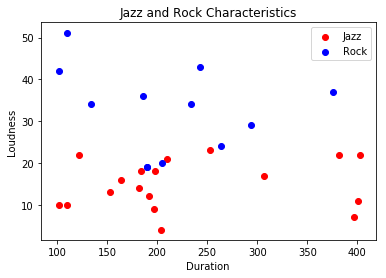

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [4]:
neighbors.predict([[35, 327]])

array([1], dtype=int64)

In [5]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[ 0.4  0.6]]


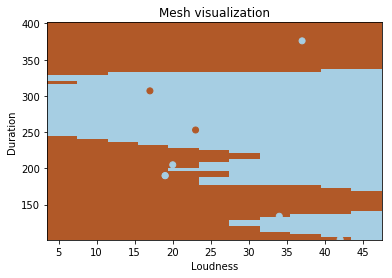

In [6]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

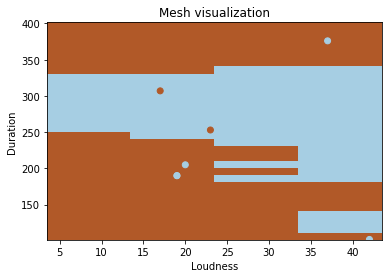

In [7]:
# Play with different mesh sizes here.
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 10.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

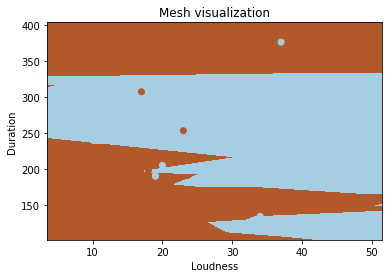

In [8]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 0.05

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### Challenge: Implement the Nearest Neighbor algorithm

In [9]:
X[0]

array([ 18, 184], dtype=int64)

In [10]:
music.duration

0     184
1     134
2     243
3     186
4     122
5     197
6     294
7     382
8     102
9     264
10    205
11    110
12    307
13    110
14    397
15    153
16    190
17    192
18    210
19    403
20    164
21    198
22    204
23    253
24    234
25    190
26    182
27    401
28    376
29    102
Name: duration, dtype: int64

#### DRILL:

Let's say we work at a credit card company and we're trying to figure out if people are going to pay their bills on time. We have everyone's purchases, split into four main categories: groceries, dining out, utilities, and entertainment. What are some ways you might use KNN to create this model? What aspects of KNN would be useful? Write up your thoughts in submit a link below.

I would use the categories given as the features and use the classification method of bills paid on time or not. It may be helpful to see where similar spending patterns create certain types of good or bad behavior

In [9]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [10]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
duration    30 non-null int64
loudness    30 non-null int64
bpm         30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


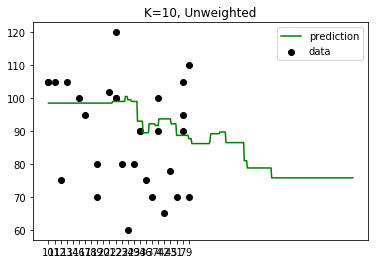

In [11]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

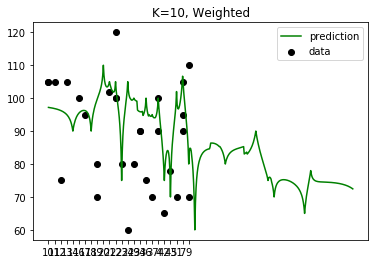

In [12]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

Why don't you add the other feature and mess around with  kk  and weighting to see if you can do any better than we've done so far?

In [14]:
Y = music.bpm
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

knn.fit(X, Y)
knn_w.fit(X, Y)

NameError: name 'stats' is not defined

In [ ]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

In [ ]:
X = music[['duration','loudness']]
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

Y = music.bpm
knn_w.fit(X, Y)

In [ ]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

#### Challenge: Model Comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [35]:
data = pd.read_csv('Data/PUGB/train.csv')

In [36]:
data = pd.DataFrame(data)

In [42]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [43]:
x = data.iloc[:,3:-1]
y = data.iloc[:,-1:]

In [40]:
picked_columns = ['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals', 'kills', 'revives', 'vehicleDestroys', 'weaponsAcquired']

In [41]:
data[picked_columns]

assists  boosts  damageDealt  headshotKills  heals  kills  revives  \
0              0       5       247.30              0      4      2        1   
1              1       0        37.65              1      0      1        0   
2              0       1        93.73              0      2      0        1   
3              0       0        95.88              0      0      0        0   
4              0       1         0.00              0      1      0        0   
5              0       2       128.10              0      0      1        0   
6              1       0       130.30              0      0      1        0   
7              1       1       661.80              3      2      5        0   
8              0       3        94.72              0      5      0        0   
9              0       0       137.60              0      0      0        0   
10             0       1       166.00              1      1      1        0   
11             0       0       219.10              0      0      0        0   
12             0       1       196.50              0      0      2        0   
13             0       5       473.40              0      3      3        0   
14             0       0       194.60              0      0      0        0   
15             0       2        51.97              0      4      0        0   
16             0       0         0.00              0      0      0        0   
17             0       6       227.40              1      8      2        0   
18             0       0        15.25              0      2      0        0   
19             0       0         0.00              0      0      0        0   
20             0       1       357.60              0      1      2        0   
21             0       0       100.00              0      0      1        0   
22             1       4      1633.00              6      3     18        0   
23             0       0        28.38              0      0      0        0   
24             2       2       277.80              0      2      2        0   
25             0       0        60.55              0      1      1        0   
26             0       0       200.00              0      0      2        0   
27             0       2       739.30              0      3      5        0   
28             0       0        24.00              0      0      0        0   
29             0       2       181.80              0      6      2        1   
...          ...     ...          ...            ...    ...    ...      ...   
4357306        0       0        28.00              0      1      0        0   
4357307        0       5       125.30              1      1      2        0   
4357308        0       1         0.00              0      4      0        0   
4357309        1       0       280.00              1      0      1        0   
4357310        0       0         0.00              0      0      0        0   
4357311        1       2       100.00              0      6      1        0   
4357312        0       0        10.18              1      0      1        0   
4357313        1       4       512.20              2      3      6        0   
4357314        0       0       181.20              0      0      1        0   
4357315        0       0         0.00              0      0      0        0   
4357316        0       0         0.00              0      0      0        0   
4357317        0       0         0.00              0      0      0        0   
4357318        0       2       145.70              0      5      2        0   
4357319        0       0       164.00              0      0      0        0   
4357320        0       5       139.00              0      1      1        0   
4357321        0       0         0.00              0      0      0        0   
4357322        2       0       143.90              0      1      1        0   
4357323        0       0         0.00              0      0      0        0   
4357324        1       1       193.60              0      1

In [44]:
OLS = smf.OLS(y,x).fit()

In [7]:
print(OLS.params, '\n')
print(OLS.pvalues, '\n')
print(OLS.rsquared)

assists              2.064474
boosts              -4.377530
damageDealt         -0.056165
DBNOs                3.722339
headshotKills       -3.251311
heals                2.468097
killPlace            4.837914
killPoints           0.980660
kills               -6.294864
killStreaks        117.580715
longestKill         -0.040069
maxPlace             3.256975
numGroups           -2.190330
revives             10.275198
rideDistance         0.002485
roadKills            3.768040
swimDistance         0.095040
teamKills           17.488611
vehicleDestroys    -17.112774
walkDistance         0.037468
weaponsAcquired     16.734224
dtype: float64 

assists             2.668949e-33
boosts              0.000000e+00
damageDealt         0.000000e+00
DBNOs              1.864289e-146
headshotKills       3.535823e-51
heals               0.000000e+00
killPlace           0.000000e+00
killPoints          0.000000e+00
kills              6.169384e-281
killStreaks         0.000000e+00
longestKill         4.5

In [8]:
lin_reg = linear_model.LinearRegression()

In [9]:
lin_reg.fit(x,y)
lin_reg.score(x,y)

0.20730314896607671

In [10]:
lin_reg.coef_

array([[  7.17521294e-01,  -1.08403997e-01,  -1.03829480e-02,
          7.26935286e-01,  -5.27737914e-01,   6.09863438e-04,
         -2.19282458e-01,   1.48264109e-01,  -9.84512679e-01,
         -5.94662684e+00,   1.26085588e-02,  -8.13922081e-01,
          8.62775623e-01,  -4.96634740e-01,   1.14847889e-03,
          1.82492216e+00,   3.23810381e-03,  -3.93501629e-01,
         -1.07095128e+00,   1.64548380e-03,   6.46602500e-01]])

In [11]:
cross_val_score(lin_reg, x, y, cv=10)

array([ 0.24547998,  0.21772142,  0.19463901,  0.1802759 ,  0.18073205,
        0.20169924,  0.20826142,  0.21017233,  0.21506957,  0.20829547])

In [12]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn.fit(x, y)